# Importing modules
<br/>

In [1]:
import pandas as pd
import numpy as np
np.random.seed(3)

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

%matplotlib inline

<br/>
# Loading the data
We have two files **train.csv** and **test.csv** which, as the name suggests, contain the training and test datasets respectively. We load them in variables with *_org* subscript to denote that they are the original csv data and perform our processings in other variables without the subscript. We save the original data because they might be needed for tallying various values.

The test.csv differs from train.csv in that it doesn't contain the column *Survived* because we need to predict those values. (It would have been ridiculously easy otherwise.)

<br/>

In [2]:
train_org = pd.read_csv("data/train.csv")
test_org = pd.read_csv("data/test.csv")
display(train_org.head(4), test_org.head(4))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


<br/>
# Data Dictionary
## Categorical
**Survived** : The value to be predicted in the test data. <br/>
0 : Not Survived | 1 : Survived<br/>
**Pclass** : The class of the people in the titanic was divided into three categories.<br/>
1 = 1st = Upper |  2 = 2nd = Middle | 3 = 3rd = Lower<br/>
**Sex** : The gender of the passengers by birth.<br/>
male | female<br/>
**Embarked** : The Port of Embarkation. There were 3 ports namely:<br/> Cherbourg(C) | Queenstown(Q) | Southampton(S).
## Numerical Discrete
**SibSp** : Number of siblings / spouses aboard the Titanic. Brother, Sister, Stepbrother, Stepsister are counted as siblings while husband and wife are counted as Spouses. Mistresses and Fiancés were ignored.<br/>
**ParCh** : Number of parents / children aboard the Titanic. Mother and father are counted as Parents while Daughters, Sons, Stepdaughters and Stepsons are counted as Children. Some children travelled only with a Nanny, therefore they have 0 ParCh.
## Numerical Continuous
**Age** : The age of the passengers in years. It is fractional if less than 1. If the age is estimated, is it in the form of xx.5.<br/>
**Fare** : The cost of the ticket for the passengers.
## Others
**PassengerId** : Just a serial number assigned to the passengers.<br/>
**Ticket** : The number assigned to the tickets of the passengers.<br/>
**Cabin** : The cabin assigned to the passengers


<br/>

In [3]:
print("*"*30+"TRAIN DATASET"+"*"*30)
print()
train_org.info()
display(train_org.describe(include='all'))

print()
print("*"*30+"TEST DATASET"+"*"*30)
print()
test_org.info()
display(test_org.describe(include='all'))

******************************TRAIN DATASET******************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nye, Mrs. (Elizabeth Ramell)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



******************************TEST DATASET******************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Lane, Mr. Patrick",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


<br/>
# Initial Observations
From above **info** output, we can observe the following about the number of people:
* There are 891 sets of data in Train dataset i.e. we can train our model on 891 people.
* There are 418 sets of data in Test dataset i.e. we need to predict survivability of 418 people.

From above **info** output, we can observe the following about the features/columns:
1. *PassengerId*, *Pclass*, *Name*, *Sex*, *SibSp*, *Parch*, *Ticket* are complete in both Testing and Training data.
+ *Fare* feature in the Training dataset is complete. However, there are only 417 instances of *Fare* in the Testing set which means 1 instance is missing.
+ There are 889 non-null instances of *Embarked* feature in the Training data which implies 2 instances are missing in this set. In the Testing data however, the *Embarked* feature is complete. 
+ There are 714 non-null instances of *Age* which means 177 instances are missing in Train data. Similarly, there are 332 non-null instances in the Test data which means 86 instances are missing here as well.
+ 615 instances of *Cabin* are missing in Train data and 327 instances of are missing in Train data.

From above **describe** output, we can observe the following about the features/columns:
1. **Survived** : Most passengers in the Train data did not survive because the mean is 0.38 which is closer to 0 than 1. From basic mathematical analysis, this means relatively more number of values are 0. This can also be verified by the fact that both Q1 and Q2 have the value 0.
+ **Pclass** : Most passengers in the Train data fall in the lower class category i.e. 3. We come to this conclusion from the fact that the mean value is ~ 2.3 which is in between 2 and 3 and both Q2 and Q3 have the value 3. The Test data follows the similar trend.
+ **Sex** : There are more males than females in both Train as well as Test data as described by the *top* value of the feature.
+ **Age** : Most people are in the range of 20-40 as described by the Mean, Q1, Q2 and Q3 values of this feature. However, the age can deviate up to 80.
+ **SibSp** and **Parch** : These are very variable data because they have standard deviation quite higher compared to the mean value.
+ **Ticket** : Nothing much can be said about this except that there are 363 *unique* data.
+ **Fare** : It is highly scattered.
+ **Cabin** : Nothing much can be said about this feature as well.
+ **Embarked** : Most people embarked from Southampton (S) as described by its *freq* value in this feature.
<br/>

# Contingency step : Making a copy of original data

** Before performing any alterations in the data, we create a copy of the original data. This will be helpful if and when the original data is needed for reference.** This step can be omitted if we are sure we won't be needing the original data later on.
1. *We leave the original data as is and create a new variable that is a copy of the original.*
2. *We also create a variable that is a pseudo-merged form of the train and test data.*

We create the copy variable so that we can reference the original data if needed later. And, we create the merged variable because the operation we perform on the train data has to be performed in the test data as well. It is advisable to remember that, the **changes made in the merged data is also reflected in the previously unmerged version of variables**. That's just how Python works. So, this merged variable makes it easier which we will observe later.

In [4]:
train = train_org.copy()
test = test_org.copy()
both_data = [train, test]

<br/>

# Further probable steps
  * **Data Deletion** : Based on our initial obervation points 8, we conclude that there is significantly huge lack of *Cabin* data in both Train (75%) and Test (78%). Therefore, it would be wise to completely drop this feature altogether instead of trying to complete this data. Similarly, *PassengerId* is just a serial number of passengers aboard the ship which does not have anything to do with their survivability and hence, can be deleted as well.
  + **Data Conversion** : Converting categorical featuress to numerical form. 
  + **Data Completion** : Based on our initial observation points 5, 6 and 7, we need to complete the features *Fare*, *Embarked* and *Age*.
  + The feature *PassengerId* is complete but not needed as a feature for obvious reasons.
  + The **Ticket** column comprises of data which are both alphanumeric as well as numeric. There are **681** unique values and remaining **210** duplicate values in the training set where as **363** unique values and remaining **55** duplicate values in the test set. The duplicate values might indicate family members or other relatives/aquaintainces having the same ticket because of buying the tickets in bulk at the same time. I didn't want to include the Ticket feature because they are very much random and do not make sense other than maybe showing group of people who were related. But this feature may be used for better performance. *Further Analysis* is required.
  + The **PassengerId** column serves just as a serial number of the people boarding the Titanic and so, can be removed as well.
  + **Feature Engineering**

<br/>

In [5]:
### PLAYING WITH TICKET DATA
# d = train_org.head(10)
# d["Tgroup"]=None
# d

# tickets = train_org["Ticket"].unique()
# ticket_dict = {}
# ticket_start_list = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "C", "S", "P", "W"]
# for start in ticket_start_list:
#     ticket_dict[start] = []
    
#     for ticket in tickets:
#         if ticket.startswith(start):
#             ticket_dict[start].append(ticket)

# for key in ticket_dict:
#     ticket_dict[key] = set(ticket_dict[key])
# ticket_dict

# d.loc[5, "Tgroup"]=1
# d

# temp = train_org.copy()
# starts_with_list = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "C", "S", "P", "W"]
# for first in starts_with_list:
#     for i in temp.values:
#         if i[8].startswith(first):
# #             print(i[8])
#             temp.loc[i[0]-1, "TGroup"]=first

# temp.head(10)

# display(pd.crosstab(temp["Survived"], temp["TGroup"]))
# temp[temp["TGroup"].isnull()]

<br/>
# Data Conversion-1a : Extracting Titles from the Name 
I found from exploring the data that there titles in the name that correspond to different groups of people. Some are Officer level, some are royalty and some just Mr, Miss or Mrs. The Master refers to younger boys.

We first extract the **Title** from the **Name** feature by sparsing the names of the passengers.

In [6]:
for df in both_data:
    df["Title"] = df["Name"].map(lambda x: x.split(',')[1].split('.')[0].strip())
display(train.head())
print("-"*70)
display(train[train["Title"].isnull()==True])
display(test[test["Title"].isnull()==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


----------------------------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


<br/>
# Data Conversion-1b : Converting Title to various Title Groups
We convert the **Title** feature extracted earlier to the group they belong to.

In [7]:
title_mapper = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
for df in both_data:
    df["TitleGrp"] = df["Title"].map(title_mapper)
display(train.head())
display(train[train["TitleGrp"].isnull()==True])
display(test[test["TitleGrp"].isnull()==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleGrp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleGrp


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleGrp


Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


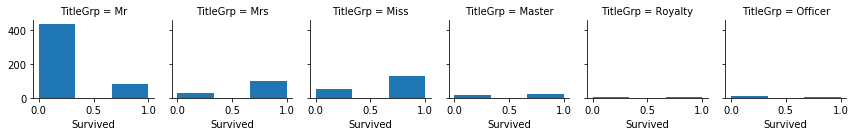

In [8]:
display(pd.crosstab(train["Sex"], train["Title"]))
display(pd.crosstab(train["Survived"], train["Title"]))
g = sns.FacetGrid(train, col='TitleGrp',size=2, aspect=1)
g.map(plt.hist, 'Survived', bins=3)

<br/>
# Data Conversion2 : Converting Categorical features into Numerical
The **Embarked** column contains data consists of one of the 3 values: 'S', 'C', 'Q'. Similarly, the **Sex** column contains either male or female values as strings which can be converted to numerical values as well. We can convert these string values into numerical values to better suit the algorithms. 

It would be better to avoid using negative values or zeros for this conversion because in the process of **feature engineering** negative values and zeros when multiplying to other values will cause *drastic changes* from previous features because of being converted from positve values to negatives or being converted directly to zeros.

<br/>

In [9]:
# embark_mapper = {'C':-1, 'S':0, 'Q':1}
# sex_mapper = {'male': -1, 'female': 1}
# train["Embarked"] = train["Embarked"].map(embark_mapper).astype(int)
# test["Embarked"] = test["Embarked"].map(embark_mapper).astype(int)
# train["Sex"] = train["Sex"].map(sex_mapper).astype(int)
# test["Sex"] = test["Sex"].map(sex_mapper).astype(int)

## Alternate Method ##
num_mapper = {
                "Embarked" : {'C' : 1, 'S': 2, 'Q' : 3},
                "Sex"      : {'male' : 1, 'female': 2},
                "TitleGrp" : {"Miss" : 1, "Mrs" : 2, "Master" : 3, "Royalty" : 4, "Officer" : 5, "Mr" : 6}
            }
for df in both_data:
    df.replace(num_mapper, inplace=True)
display(train.head(2), test.head(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleGrp
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0,Mr,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs,2


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleGrp
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3,Mr,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,2,Mrs,2


<br/>
# Data Deletion : Cabin, PassengerId, Name
**PassengerId** is just a serial number of passengers which will have no impact on their survivability. We will later have to add PassengerId to our predicted data because it is required in the submission format.

As we know that **Cabin** data is sparsely filled, we remove this feature. Upon exploration of this data which is beyond the scope of this notebook, I found that Cabin was designated only to *First* class people in general. There are however exceptions such as no Cabin designated to a few number of *First* class passengers and Cabin being designated to even the *Second* class passengers. This data might also be correlated to the **Fare** feauture because getting a Cabin for oneself might have been costly. Again, this too has not been explored in this notebook.

The feature **Ticket** might also have some meaning depending upon the first letter(1) or first number(s) or the number of digits in thier value. This too might be added later as a feature but for now, we ignore them.

Furthermore, the **Name** feature has served its purpose because we have extracted 2 features namely **Title** and **TitleGrp** from it. Hence, we can delete this feature for now. An alternative to this is to extract **Surname** as well but i don't think it will be that much fruitful.

In [10]:
for df in both_data:
    df.drop(["Cabin", "Ticket", "PassengerId", "Name"], axis=1, inplace=True)
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TitleGrp
0,0,3,1,22.0,1,0,7.2500,2.0,Mr,6
1,1,1,2,38.0,1,0,71.2833,1.0,Mrs,2


<br/>
# Data Completion-1: Filling remaining values for Embarked (train only)
There seems to be 2 rows in training set which do not have an Embarked value. We can fill the value by the one that is most frequently occurring, which in our case seems to be 'S'.

In [11]:
display(train[train.Embarked.isnull()==True])

print("-"*55)
print("Empty values before filling the Embarked data: ", train["Embarked"].isnull().sum())

most_embarked = train["Embarked"].mode()[0]                   # mode operates on series train.Embarked
train["Embarked"] = train["Embarked"].fillna(most_embarked)   # fillna operates on train.Embarked series & returns series

assert train["Embarked"].isnull().sum() == 0, "There are still some empty Embarked data"
print("Empty values after filling the Embarked data:  ", train["Embarked"].isnull().sum())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TitleGrp
61,1,1,2,38.0,0,0,80.0,NaN,Miss,1
829,1,1,2,62.0,0,0,80.0,NaN,Mrs,2


-------------------------------------------------------
Empty values before filling the Embarked data:  2
Empty values after filling the Embarked data:   0


# Data Completion-2: Filling Fare value of passengers (test only)
We might be using the **Fare** feature for making our predictions. However, there is a missing value in the **test** data. Therefore we fill this value with the median value of the class in which the passenger belongs to. We use only test data to calculate said median.

In [12]:
test[test.Fare.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TitleGrp
152,3,1,60.5,0,0,NaN,2,Mr,6


In [13]:
temp = test[(test.Pclass == 3)]["Fare"]
median_fare = temp.median()
test.loc[test.Fare.isnull(), "Fare"] = median_fare

assert test.Fare.isnull().sum() == 0, "There are still missing Fare values"

# Data Completion-3: Filling Age value of passengers
There are some values of **Age** feature missing in both train and test data. Therefore, we complete such missing data with the median age value of the group of passengers having same **Sex** and **Pclass** as the passenger.
<br/>

In [14]:
for df in both_data:
    for i in range(1, 3):
        for j in range(1,4):
            truth_table = (df["Sex"] == i) & (df["Pclass"] == j)
            temp_df = df[truth_table]["Age"].dropna()
            median_age = temp_df.median()
            df.loc[(df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j),"Age"] = median_age

assert train.Age.isnull().sum() == 0, "There are still missing Age features in Train!!"
assert test.Age.isnull().sum() == 0, "There are still missing Age features in Test!!"

<br/>
# Correlation analysis
Since we have many numerical features now, we might try analysing the correlation of such features to see how much impact they have on the survivability of the passengers. The *corr* function of the pandas dataframe by default calculates the **Karl Pearson** Coefficient of numerical features available in the dataframe.

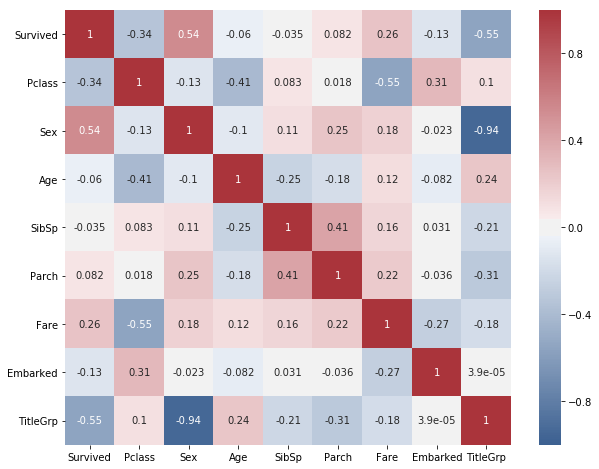

In [15]:
# ### Mask for hiding upper traingle from the correlation map. If needed pass this as "mask" parameter in heatmap
# mask = np.zeros_like(train.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Setting the sizes of the correlatioin figure map
_, ax = plt.subplots(figsize=(10,8))

# Colormap : Colors to denote correlation values
cmap = sns.diverging_palette(250 , 10, s=68, l=40, as_cmap = True )

# Plotting heatmap using seaborn
sns.heatmap(train.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)

We observe that the **TitleGrp** of the passengers has most correlation with **Survived**. This is so because, I had performed a trick while enumerating this feature: I had chosen, through intuition, the group with the highest survival rate as the lowest number i.e. 1. I enumerated the next group with highest survival rate as 2 and so on. 

This feature is in turn, highly correlated with the **Sex** feature. Moreover, the **Sex** is the next most correlated with the Survived feature. This is supported by that fact that children and females are usually given priority in such events of distress.

In [16]:
display(train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
display(pd.crosstab(train["Survived"], train["Sex"]))
display(train[["TitleGrp", "Survived"]].groupby(['TitleGrp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

,Sex,Survived
1,2,0.742038
0,1,0.188908


Sex,1,2
Survived,,
0,468,81
1,109,233


,TitleGrp,Survived
1,2,0.795276
0,1,0.701087
3,4,0.600000
2,3,0.575000
4,5,0.277778
5,6,0.156673


We observe that **Pclass** is the next most correlated value with **Survived**. This feature represents the class division of passengers. The correlation however, is negative; this means that the higher the value of Pclass, the lowever is the survival rate. This is supported by the fact that at this misforunate event, the well off people were given priority for survival. Moreover, the lower levels of the ship, also knows as the **Steerage**, was the first to be flooded. Knowing that the *lower* class people were designated to stay at lower levels of the ship, bolsters this correlation.

We further check the **Pclass** individually against **Survived** and observe that the *first* class people were most likely to survive. Moreover, as the class decreased, so did their probability of survival. 

In [17]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Fare** is the third most correlated value with **Survived**. One of the reasons this could be is due to the fact that *First* class people had paid the highest amount of fare while the *Lower* class had respectively paid lower amount. This variation in the Fare must have been due to the fact higher class passengers had better accomodation and vice versa.

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


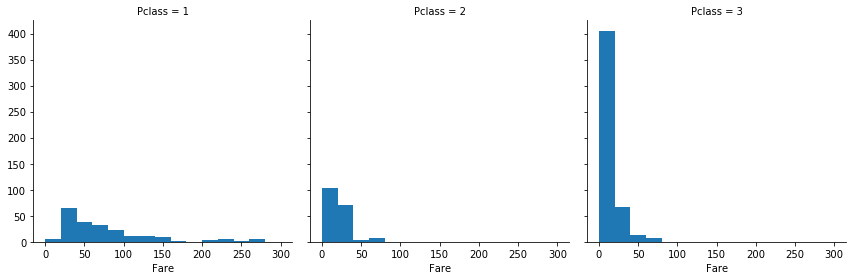

In [18]:
display(train[["Pclass", "Fare"]].groupby(["Pclass"], as_index=False).mean())
g = sns.FacetGrid(train, col='Pclass', size=4)
g.map(plt.hist, 'Fare', range=(0,300), bins=15)

# Feature Engineering : Creating new features from combination of previous

In [19]:
for df in both_data:
    df["Family"]=2*df["Parch"]-df["SibSp"]**1.5
    df["ClassBark"]=df["Pclass"]*8+df["Embarked"]
    df["PS"]=df["Sex"]**13-df["Pclass"]*3000+1600*df["Sex"]

<br/>
# Correlation Analysis Revisited
We again perform correlation analysis to find the best correlated features with **Survived**.

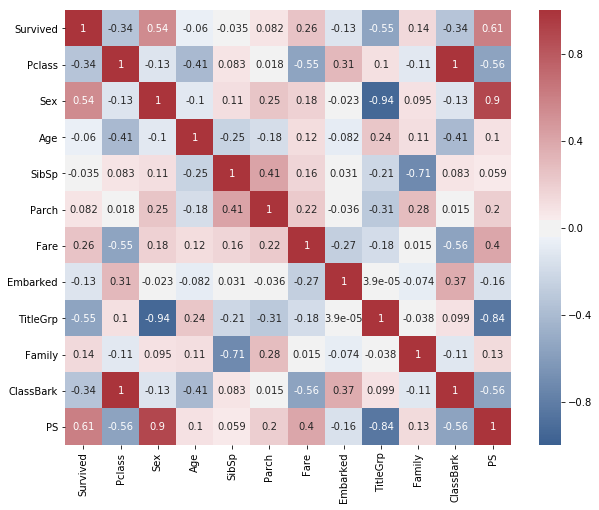

In [20]:
# ### Mask for hiding upper traingle from the correlation map. If needed pass this as "mask" parameter in heatmap
# mask = np.zeros_like(train.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Setting the sizes of the correlatioin figure map
_, ax = plt.subplots(figsize=(10,8))

# Colormap : Colors to denote correlation values
cmap = sns.diverging_palette(250 , 10, s=68, l=40, as_cmap = True )

# Plotting heatmap using seaborn
sns.heatmap(train.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)

# Saving Data
Let us consider that, we have hopefully processed the data successfully. To avoid doing these processes over and over, we simply save the processed data using the **pickle** module.

In [21]:
with open("processed.pickle", "wb") as f:
    pickle.dump(both_data, f)